## エントロピーとジニ係数

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### 情報量とは

情報量とは、確率変数$x$の値を得た際の驚きの度合いを表す指標。起きそうもない事象が起きたと知ったら、いつでも起きそうな事象が起きたことを知るよりも多くの情報を得たといえる。
  
$h(x) = - \log_2p(x)$  
  
$h(x):$ 情報量  
$x:$ 確率変数  
$p(x):$ $x$となる確率  
  
#### [例]  
例えば、東京に雨が降ったという情報よりも、砂漠に雨が降った(確率が低い事象)という情報の方が驚くはずである。  
ある日に、東京に雨が降る確率$p(x)$を0.3とすれば、その情報量は、  
$h(x) = - \log_2p(0.3) = 1.737$  
となり、ある日に、砂漠に雨が降る確率$p(x)$を0.01とすれば、その情報量は、  
$h(x) = - \log_2p(0.01) = 6.644$  
となる。


### log2の復習

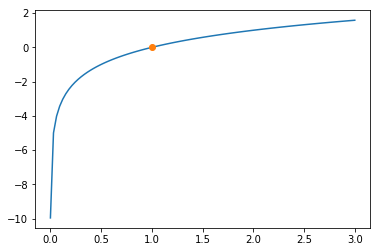

log_2(0.1)= -3.321928094887362
log_2(0.3)= -1.7369655941662063
log_2(0.5)= -1.0
log_2(1.0)= 0.0


In [2]:
x = np.linspace(0.001,3,100)
y = np.log2(x)
plt.plot(x,y)
plt.plot(1,0, marker="o")
plt.show()

print("log_2(0.1)=", np.log2(0.1))
print("log_2(0.3)=", np.log2(0.3))
print("log_2(0.5)=", np.log2(0.5))
print("log_2(1.0)=", np.log2(1.0))

* $p(x) \leq 1$であるため、$\log_2p(x) \leq 0$となる
* $p(x)$が小さいほど、$-\log_2p(x)$は大きくなる

 ### エントロピー（平均情報量）とは

エントロピーとは、情報量を平均化したものであり、確率変数$x$のばらつき具合を表す。エントロピーは下式により求められる。
  
$E = - \sum p(x)\log_2p(x)$

$E:$ エントロピー  
$x:$ 確率変数  
$p(x):$ $x$となる確率  

ただし、    
$\sum(p(x))=1$  
$\max p(x) \leq 1$　　  
$p(x)=0$のときは$\log_2(x)=0$とする  

ここで、$E$は分布$p(x)$の期待値に相当する。

 ### ジニ係数とは
ジニ係数とは、誤分類する確率を平均化した指標である。

$G = \sum p(x) (1 - p(x)) = 1 - \sum p(x)^2$

$G:$ ジニ係数  
$x:$ 確率変数  
$p(x):$ $x$となる確率  

#### [例]    
例えば、ある日の東京の天気の確率が、$p($晴れ$)=0.5$、$p($雨$)=0.3$、$p($曇り$)=0.2$とすると、そのエントロピー$E$とジニ係数$G$は、  

$E = - \sum p(x)\log_2p(x) = 1.485$  
$G = 1 - \sum p(x)^2  = 0.62$  

となり、ある日の砂漠の天気の確率が、$p($晴れ$)=0.9$、$p($雨$)=0.01$、$p($曇り$)=0.09$とすると、そのエントロピー$E$とジニ係数$G$は、

$E = - \sum p(x)\log_2p(x) = 0.516$  
$G = 1 - \sum p(x)^2  = 0.182$  

となる。  

東京の天気は、確率変数$x$がばらついており、砂漠の天気に比べ予測が難しいと言える。

In [3]:
def entropy(px):
    """
    px : array like
    """
    px = np.array(px).astype(float)
    px[px==0] = 1e-10 #logx(0)は計算できないため、小さな値に置き換えておく
    return -1 * np.sum(px*np.log2(px))

def gini_index(px):
    """
    px : array like
    """
    px = np.array(px).astype(float)
    return 1 - np.sum(px ** 2)

def entropy_and_gini_index_plot(px):
    pd.DataFrame(px).plot.bar(figsize=(7,2))
    plt.ylim([0,1.0])
    plt.ylabel("p(x)")
    plt.xlabel("Discrete probablity variable")
    title = "Entropy = %s  "% round(entropy(px),4) + "Gini index = %s"% round(gini_index(px),4)
    plt.title(title)
    plt.show()

### 2値問題のエントロピー

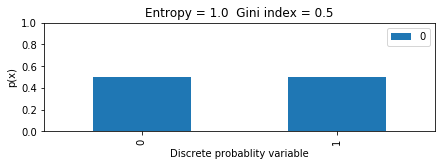

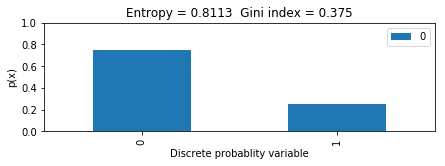

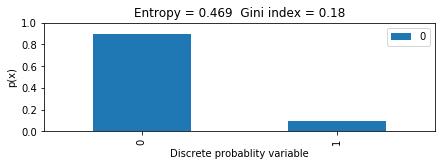

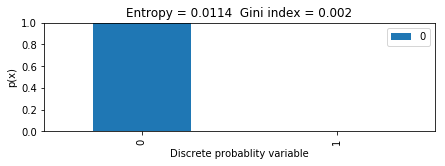

In [4]:
entropy_and_gini_index_plot([0.5,0.5])
entropy_and_gini_index_plot([0.75,0.25])
entropy_and_gini_index_plot([0.9,0.1])
entropy_and_gini_index_plot([0.999,0.001])

### 3ラベル問題のエントロピー

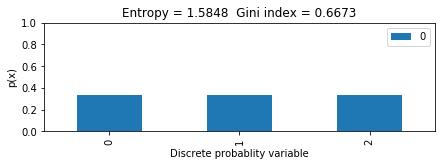

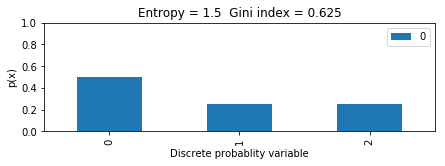

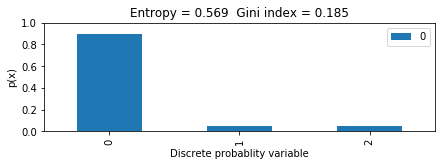

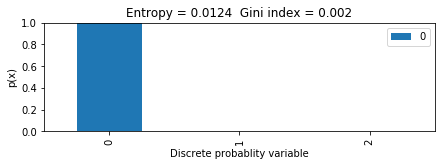

In [5]:
entropy_and_gini_index_plot([0.333,0.333, 0.333])
entropy_and_gini_index_plot([0.5,0.25, 0.25])
entropy_and_gini_index_plot([0.9,0.05, 0.05])
entropy_and_gini_index_plot([0.999,0.0005, 0.0005])

### 10ラベル問題のエントロピー

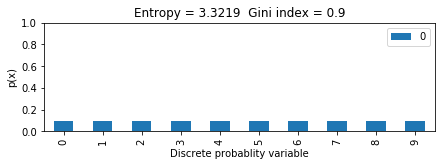

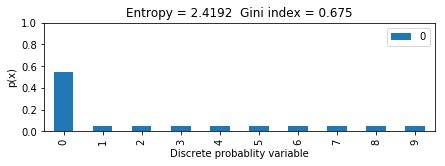

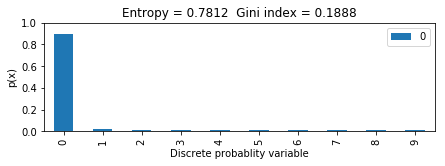

In [6]:
entropy_and_gini_index_plot([0.1]*10)
entropy_and_gini_index_plot([0.55]+[0.05]*9)
entropy_and_gini_index_plot([0.9, 0.02]+[0.01]*8)

### 二値問題におけるエントロピーとジニ係数の変化
- $p(x) = 0.5$のとき、エントロピー・ジニ係数は最大となる

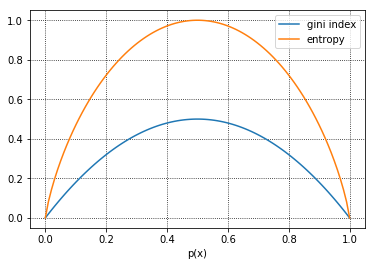

In [7]:
p_list = np.linspace(0, 1, 100)
gini = np.zeros(len(p_list))
ent = np.zeros(len(p_list))

for i, p in enumerate(p_list):
    gini[i] = gini_index(np.array([p, 1 - p]))
    ent[i] = entropy(np.array([p, 1 - p]))

plt.plot(p_list, gini, label='gini index')
plt.plot(p_list, ent, label='entropy')
plt.grid(which='major', color='black', linestyle=':')
plt.grid(which='minor', color='black', linestyle=':')
plt.legend(loc='best')
plt.xlabel("p(x)")
plt.show()